In [1]:
# pip install split-folder

In [1]:
import cv2
import glob
import os
import numpy as np
import splitfolders

In [2]:
###### Pre-Processing Code Below commented Out ####

In [4]:
inputFolder = 'images/no_target'
folderLen = len(inputFolder)
os.makedirs('images/Resized/no_target')

In [5]:
for img in glob.glob(inputFolder + "/*.jpg"):
    image = cv2.imread(img)
    resized_img = cv2.resize(image,(256,256))
    cv2.imwrite("images/Resized/no_target" + img[folderLen:], resized_img)
    
cv2.destroyAllWindows()

for img in glob.glob(inputFolder + "/*.jpeg"):
    image = cv2.imread(img)
    resized_img = cv2.resize(image,(256,256))
    cv2.imwrite("images/Resized/no_target" + img[folderLen:], resized_img)
    
cv2.destroyAllWindows()

for img in glob.glob(inputFolder + "/*.JPEG"):
    image = cv2.imread(img)
    resized_img = cv2.resize(image,(256,256))
    cv2.imwrite("images/Resized/no_target" + img[folderLen:], resized_img)
    
cv2.destroyAllWindows()

for img in glob.glob(inputFolder + "/*.PNG"):
    image = cv2.imread(img)
    resized_img = cv2.resize(image,(256,256))
    cv2.imwrite("images/Resized/no_target" + img[folderLen:], resized_img)
    
cv2.destroyAllWindows()

for img in glob.glob(inputFolder + "/*.webp"):
    image = cv2.imread(img)
    resized_img = cv2.resize(image,(256,256))
    cv2.imwrite("images/Resized/no_target" + img[folderLen:], resized_img)
    
cv2.destroyAllWindows()

In [6]:
inputFolder = 'images/target'
folderLen = len(inputFolder)
os.makedirs('images/Resized/target')

In [7]:
for img in glob.glob(inputFolder + "/*.jpg"):
    image = cv2.imread(img)
    resized_img = cv2.resize(image,(256,256))
    cv2.imwrite("images/Resized/target" + img[folderLen:], resized_img)
    
cv2.destroyAllWindows()

for img in glob.glob(inputFolder + "/*.jpeg"):
    image = cv2.imread(img)
    resized_img = cv2.resize(image,(256,256))
    cv2.imwrite("images/Resized/target" + img[folderLen:], resized_img)
    
cv2.destroyAllWindows()

for img in glob.glob(inputFolder + "/*.JPEG"):
    image = cv2.imread(img)
    resized_img = cv2.resize(image,(256,256))
    cv2.imwrite("images/Resized/target" + img[folderLen:], resized_img)
    
cv2.destroyAllWindows()

for img in glob.glob(inputFolder + "/*.PNG"):
    image = cv2.imread(img)
    resized_img = cv2.resize(image,(256,256))
    cv2.imwrite("images/Resized/target" + img[folderLen:], resized_img)
    
cv2.destroyAllWindows()

for img in glob.glob(inputFolder + "/*.webp"):
    image = cv2.imread(img)
    resized_img = cv2.resize(image,(256,256))
    cv2.imwrite("images/Resized/target" + img[folderLen:], resized_img)
    
cv2.destroyAllWindows()

In [8]:
splitfolders.ratio('images/Resized', output="images/Resized_Split", seed=617, ratio=(0.8, 0.2),group_prefix=None) 

Copying files: 2689 files [00:00, 4779.07 files/s]


In [24]:
############################## End of Pre-Processing #########################

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.preprocessing.image import  ImageDataGenerator, img_to_array, load_img
from keras.preprocessing import image
from keras import backend as K
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from keras.models import load_model
from keras.models import Model
import keras

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16

#Variable defining
SAMPLE_PER_CATEGORY = 1144
SEED = 617
WIDTH = 256
HEIGHT = 256
DEPTH = 3
INPUT_SHAPE = (WIDTH, HEIGHT, DEPTH)

data_dir = 'images/Resized_Split/'
train_dir = os.path.join(data_dir, 'train')
# print(train_dir)
test_dir = os.path.join(data_dir, 'val')

In [3]:
#Defining Categories
CATEGORIES = ['no_target','target']
NUM_CATEGORIES = len(CATEGORIES)
NUM_CATEGORIES

2

In [4]:
#Training Sample data set
for category in CATEGORIES:
    print('{} {} images'.format(category, len(os.listdir(os.path.join(train_dir, category)))))

no_target 1144 images
target 1144 images


In [5]:
def read_img(filepath, size):
    img = image.load_img(os.path.join(data_dir, filepath), target_size=size) ## https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img
    img = image.img_to_array(img)
    return img

In [6]:
train = []
for category_id, category in enumerate(CATEGORIES):
    for file in os.listdir(os.path.join(train_dir, category)):
        train.append(['train/{}/{}'.format(category, file), category_id, category])
train = pd.DataFrame(train, columns=['file', 'category_id', 'category'])
train.shape

(2288, 3)

In [7]:
train.tail(3)

,file,category_id,category
2285,train/target/n02325366_7056.JPEG,1,target
2286,train/target/y0dlyl7zpce61.jpg,1,target
2287,train/target/n02325366_5095.JPEG,1,target


In [8]:
#Generating vector for training samples taking equal number of images from each category
train = pd.concat([train[train['category'] == c][:SAMPLE_PER_CATEGORY] for c in CATEGORIES])
train = train.sample(frac=1)
train.index = np.arange(len(train))
train.shape

(2288, 3)

In [9]:
train

,file,category_id,category
0,train/no_target/33bc0da8-e82f-46e4-9250-f9d001...,0,no_target
1,train/no_target/n02325366_5813.JPEG,0,no_target
2,train/no_target/n02325366_1407.JPEG,0,no_target
3,train/no_target/n02325366_8097.JPEG,0,no_target
4,train/target/n02325366_4680.JPEG,1,target
...,...,...,...
2283,train/no_target/n02325366_11424.JPEG,0,no_target
2284,train/no_target/n02325366_2215.JPEG,0,no_target
2285,train/no_target/squirrel_0056.png,0,no_target
2286,train/no_target/nov5pracadh61.jpg,0,no_target


In [10]:
#Understanding Test Set
test = []
for category_id,category in enumerate(CATEGORIES):
    for file in os.listdir(os.path.join(test_dir,category)):
        test.append(['test/{}/{}'.format(category,file), category_id, category])
test = pd.DataFrame(test, columns=['file', 'category_id','category'])
test.shape

(574, 3)

In [11]:
test.head(3)

,file,category_id,category
0,test/no_target/n02325366_3171.JPEG,0,no_target
1,test/no_target/squirrel_0148.png,0,no_target
2,test/no_target/8nrwjif82gj61.jpg,0,no_target


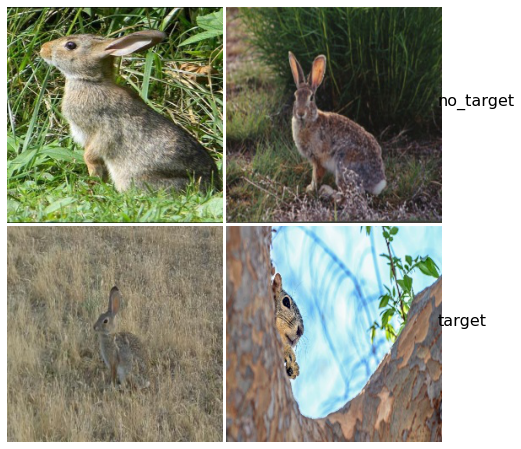

In [29]:
### Generate Example Images
# fig = plt.figure(1, figsize=(NUM_CATEGORIES, NUM_CATEGORIES))
fig = plt.figure(1, figsize=(8, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(NUM_CATEGORIES, NUM_CATEGORIES), axes_pad=0.05)
i = 0
for category_id, category in enumerate(CATEGORIES):
    for filepath in train[train['category'] == category]['file'].values[:NUM_CATEGORIES]:
        ax = grid[i]
        img = read_img(filepath, (WIDTH, HEIGHT))
        ax.imshow(img / 255.)
        ax.axis('off')
        if i % NUM_CATEGORIES == NUM_CATEGORIES - 1:
            ax.text(250, 112, filepath.split('/')[1], verticalalignment='center')
        i += 1
plt.show();

In [16]:
np.random.seed(seed=SEED)

In [17]:
def setTrainableLayersResNet(resnet_model):
    set_trainable = False
    for layer in resnet_model.layers:
        if layer.name in ['res5c_branch2b', 'res5c_branch2c', 'activation_97']:
            set_trainable = True
            
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False
    return resnet_model

In [18]:
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)

output = resnet.layers[-1].output
output = keras.layers.Flatten()(output)
resnet_model = Model(resnet.input, output)

setTrainableLayersResNet(resnet_model)
# resnet_model.trainable = False
# for layer in resnet_model.layers:
#     layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in resnet_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

<ipython-input-18-c4841ae8439c>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fae80741910>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7fae806dd3d0>,conv1_pad,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fae8063fc40>,conv1_conv,False
3,<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fae80686460>,conv1_bn,False
4,<tensorflow.python.keras.layers.core.Activation object at 0x7fae80665a30>,conv1_relu,False
...,...,...,...
171,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fae8096b8e0>,conv5_block3_3_conv,False
172,<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fae80b9fdf0>,conv5_block3_3_bn,False
173,<tensorflow.python.keras.layers.merge.Add object at 0x7fae80b7f190>,conv5_block3_add,False
174,<tensorflow.python.keras.layers.core.Activation object at 0x7fae80ba5d00>,conv5_block3_out,False


In [19]:
def printHistory(history, title, epochs):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle(title, fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epoch_list = list(range(1,epochs+1))
    ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, epochs+1, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, epochs+1, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

In [20]:
def createModel(pretrainedModel, fineTune, number_of_hidden_layers, activation, optimizer, learning_rate, epochs):
    print("Create Model")

    transfer_model = 0 # just define
    
    if pretrainedModel == "ResNet-50":
        transfer_model = ResNet50(weights='imagenet', input_shape=INPUT_SHAPE, include_top=False)
        if fineTune == True:
            transfer_model = setTrainableLayersResNet(transfer_model)
        else:
            for layer in transfer_model.layers:
                transfer_model.trainable = False  # freeze feature extracting layers
    elif pretrainedModel == "VGG-19":
        transfer_model = VGG19(weights='imagenet', input_shape=INPUT_SHAPE, include_top=False)
        
        if fineTune == True:
            transfer_model = setTrainableLayersVGG(transfer_model)
        else:
            for layer in transfer_model.layers:
                layer.trainable = False  # freeze feature extracting layers

    output = transfer_model.layers[-1].output
    output = keras.layers.Flatten()(output)
    trans_model = Model(transfer_model.input, output)

    model = Sequential()
    model.add(trans_model)
    
    for i in range(0,number_of_hidden_layers):
        model.add(Dense(512))
        model.add(Activation(activation))
        model.add(Dropout(0.3))

    model.add(Dense(2, activation='softmax'))

    if optimizer == 'SGD':
        opt = SGD(lr=learning_rate, decay=learning_rate / epochs)
    elif optimizer == 'Adam':
        opt = Adam(lr=learning_rate, decay=learning_rate / epochs)

    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model


In [21]:
#callbacks for keras modal
def get_callbacks(patience):
    print("Get Callbacks")

    lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=1e-5, patience=patience, verbose=1)
    #msave = ModelCheckpoint(filepath, save_best_only=True)
    return [lr_reduce, EarlyStopping()]

In [23]:
def trainModelDF(images, pretrainedModel, fineTune, epochs, batch_size, learning_rate, cross_validation_folds, activation, number_of_hidden_layers, optimizer):
    print("Train Model")
     
    datagen_train = ImageDataGenerator(rescale=1./255)
    
    datagen_valid = ImageDataGenerator(rescale=1./255)
        
    print("Cross validation")
    kfold = StratifiedKFold(n_splits=cross_validation_folds, shuffle=True)
    cvscores = []
    iteration = 1
    
    t = images.category_id
    
    for train_index, test_index in kfold.split(np.zeros(len(t)), t):

        print("======================================")
        print("Iteration = ", iteration)

        iteration = iteration + 1

        train = images.loc[train_index]
        test = images.loc[test_index]

        print("======================================")
        
        model = createModel(pretrainedModel, fineTune, number_of_hidden_layers, activation, optimizer, learning_rate, epochs)

        print("======================================")
        
        train_generator = datagen_train.flow_from_dataframe(dataframe=train,
                                                  directory='images/Resized_Split/',
                                                  x_col="file",
                                                  y_col="category",
                                                  batch_size=batch_size,
                                                  seed=SEED,
                                                  shuffle=True,
                                                  class_mode="categorical",
                                                  target_size=(HEIGHT, WIDTH));
        valid_generator=datagen_valid.flow_from_dataframe(dataframe=test,
                                                  directory='images/Resized_Split/',
                                                  x_col="file",
                                                  y_col="category",
                                                  batch_size=batch_size,
                                                  seed=SEED,
                                                  shuffle=False,
                                                  class_mode="categorical",
                                                  target_size=(HEIGHT, WIDTH));
        
        STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
        STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

        #Trains the model on data generated batch-by-batch by a Python generator
        history = model.fit_generator(generator=train_generator,\
                            validation_data = valid_generator, \
                            steps_per_epoch=STEP_SIZE_TRAIN, \
                            validation_steps=STEP_SIZE_VALID, \
                            epochs=epochs, \
                            verbose=1)#, \
#                             callbacks = get_callbacks(patience=2))
        
        scores = model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID)
        print("Accuarcy %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)
        
        printHistory(history, pretrainedModel, epochs)

    accuracy = np.mean(cvscores);
    std = np.std(cvscores);
    print("Accuracy: %.2f%% (+/- %.2f%%)" % (accuracy, std))
    return accuracy, std

Train Model
Cross validation
Iteration =  1
Create Model
Found 1830 validated image filenames belonging to 2 classes.
Found 458 validated image filenames belonging to 2 classes.
Epoch 1/32


/home/tapan/anaconda3/envs/RTX/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


457/457 [==============================] - 186s 403ms/step - loss: 6.6440 - accuracy: 0.4766 - val_loss: 0.6933 - val_accuracy: 0.5022
Epoch 2/32
457/457 [==============================] - 177s 387ms/step - loss: 0.6945 - accuracy: 0.5013 - val_loss: 0.6963 - val_accuracy: 0.5022
Epoch 3/32
457/457 [==============================] - 177s 387ms/step - loss: 0.6962 - accuracy: 0.5053 - val_loss: 0.6980 - val_accuracy: 0.5022
Epoch 4/32
457/457 [==============================] - 175s 383ms/step - loss: 0.6933 - accuracy: 0.5115 - val_loss: 0.6935 - val_accuracy: 0.5022
Epoch 5/32
457/457 [==============================] - 176s 386ms/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 0.6935 - val_accuracy: 0.5022
Epoch 6/32
457/457 [==============================] - 176s 385ms/step - loss: 0.6933 - accuracy: 0.4846 - val_loss: 0.6935 - val_accuracy: 0.4956
Epoch 7/32
457/457 [==============================] - 173s 379ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6932 - val_accura

/home/tapan/anaconda3/envs/RTX/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuarcy accuracy: 50.22%
Iteration =  2
Create Model
Found 1830 validated image filenames belonging to 2 classes.
Found 458 validated image filenames belonging to 2 classes.
Epoch 1/32


/home/tapan/anaconda3/envs/RTX/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


457/457 [==============================] - 174s 377ms/step - loss: 6.9458 - accuracy: 0.4986 - val_loss: 0.6934 - val_accuracy: 0.4978
Epoch 2/32
457/457 [==============================] - 174s 380ms/step - loss: 0.6939 - accuracy: 0.5128 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 3/32
457/457 [==============================] - 172s 375ms/step - loss: 0.7509 - accuracy: 0.4921 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 4/32
457/457 [==============================] - 173s 380ms/step - loss: 0.6933 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 5/32
457/457 [==============================] - 174s 381ms/step - loss: 0.6934 - accuracy: 0.4826 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 6/32
457/457 [==============================] - 172s 377ms/step - loss: 0.6933 - accuracy: 0.4934 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 7/32
457/457 [==============================] - 176s 386ms/step - loss: 0.6931 - accuracy: 0.5004 - val_loss: 0.6931 - val_accura

/home/tapan/anaconda3/envs/RTX/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuarcy accuracy: 49.78%
Iteration =  3
Create Model
Found 1830 validated image filenames belonging to 2 classes.
Found 458 validated image filenames belonging to 2 classes.
Epoch 1/32


/home/tapan/anaconda3/envs/RTX/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


457/457 [==============================] - 175s 379ms/step - loss: 10.7006 - accuracy: 0.4952 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 2/32
457/457 [==============================] - 170s 371ms/step - loss: 0.7047 - accuracy: 0.5000 - val_loss: 0.6951 - val_accuracy: 0.4978
Epoch 3/32
457/457 [==============================] - 171s 374ms/step - loss: 0.6924 - accuracy: 0.5388 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/32
457/457 [==============================] - 171s 375ms/step - loss: 0.6934 - accuracy: 0.4662 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 5/32
457/457 [==============================] - 172s 375ms/step - loss: 0.6936 - accuracy: 0.4955 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 6/32
457/457 [==============================] - 171s 374ms/step - loss: 0.6933 - accuracy: 0.4976 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 7/32
457/457 [==============================] - 171s 374ms/step - loss: 0.6934 - accuracy: 0.4894 - val_loss: 0.6935 - val_accur

/home/tapan/anaconda3/envs/RTX/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuarcy accuracy: 50.00%
Iteration =  4
Create Model
Found 1831 validated image filenames belonging to 2 classes.
Found 457 validated image filenames belonging to 2 classes.
Epoch 1/32


/home/tapan/anaconda3/envs/RTX/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


457/457 [==============================] - 177s 383ms/step - loss: 7.7366 - accuracy: 0.4738 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/32
457/457 [==============================] - 173s 378ms/step - loss: 0.6997 - accuracy: 0.4846 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/32
457/457 [==============================] - 174s 381ms/step - loss: 0.6950 - accuracy: 0.4746 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/32
457/457 [==============================] - 174s 382ms/step - loss: 0.6931 - accuracy: 0.5182 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/32
457/457 [==============================] - 175s 384ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/32
457/457 [==============================] - 176s 385ms/step - loss: 0.6931 - accuracy: 0.5162 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/32
457/457 [==============================] - 174s 380ms/step - loss: 0.6932 - accuracy: 0.4680 - val_loss: 0.6931 - val_accura

/home/tapan/anaconda3/envs/RTX/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuarcy accuracy: 50.00%
Iteration =  5
Create Model
Found 1831 validated image filenames belonging to 2 classes.
Found 457 validated image filenames belonging to 2 classes.
Epoch 1/32


/home/tapan/anaconda3/envs/RTX/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


457/457 [==============================] - 175s 379ms/step - loss: 13.6251 - accuracy: 0.5012 - val_loss: 0.6981 - val_accuracy: 0.4956
Epoch 2/32
457/457 [==============================] - 170s 372ms/step - loss: 0.6952 - accuracy: 0.5341 - val_loss: 0.6965 - val_accuracy: 0.4978
Epoch 3/32
457/457 [==============================] - 171s 373ms/step - loss: 0.6968 - accuracy: 0.5079 - val_loss: 0.6948 - val_accuracy: 0.4956
Epoch 4/32
457/457 [==============================] - 170s 371ms/step - loss: 0.6931 - accuracy: 0.4904 - val_loss: 0.6956 - val_accuracy: 0.4978
Epoch 5/32
457/457 [==============================] - 171s 374ms/step - loss: 0.6933 - accuracy: 0.4806 - val_loss: 0.6968 - val_accuracy: 0.4956
Epoch 6/32
457/457 [==============================] - 170s 373ms/step - loss: 0.6933 - accuracy: 0.5095 - val_loss: 0.6947 - val_accuracy: 0.4978
Epoch 7/32
457/457 [==============================] - 173s 378ms/step - loss: 0.6932 - accuracy: 0.4754 - val_loss: 0.6970 - val_accur

/home/tapan/anaconda3/envs/RTX/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuarcy accuracy: 50.22%
Accuracy: 50.04% (+/- 0.16%)


(50.04385948181152, 0.164107154100164)

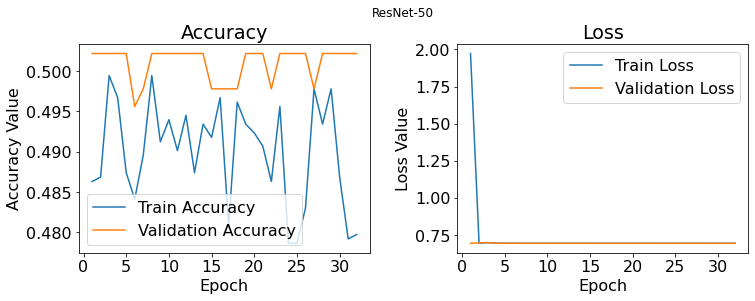

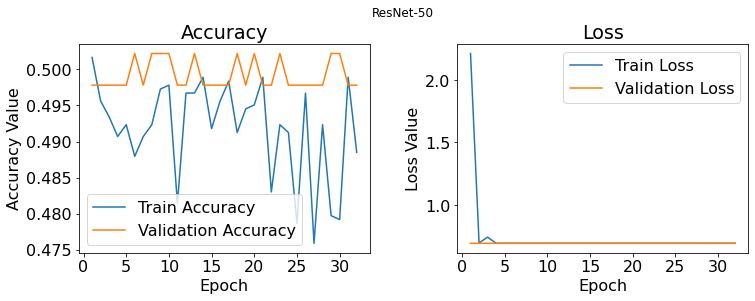

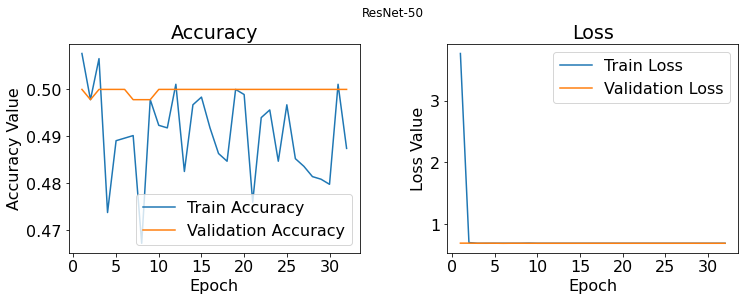

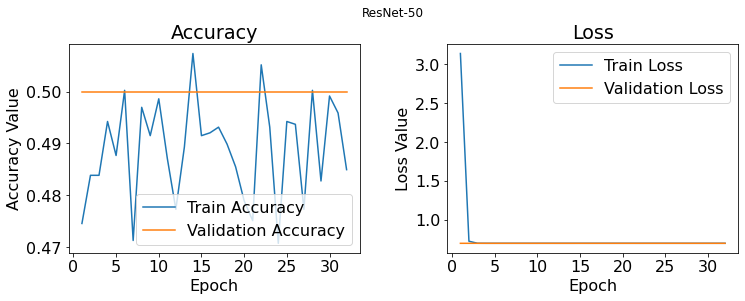

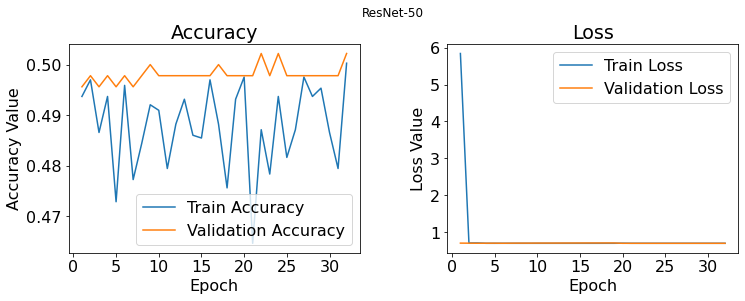

In [25]:
trainModelDF(
    train,
    pretrainedModel = "ResNet-50", #ResNet-50
    fineTune = False,
    batch_size =4,
    cross_validation_folds = 5,
    learning_rate = 0.001,
    activation = 'relu',
    number_of_hidden_layers = 1,
    optimizer = 'Adam',
    epochs = 32
)

In [30]:
def trainFinalModel(images, pretrainedModel, fineTune, epochs, batch_size, learning_rate, activation, number_of_hidden_layers, optimizer):
    print("Train Model")
     
    datagen_train = ImageDataGenerator(rescale=1./255)
    
    print("======================================")    
    model = createModel(pretrainedModel, fineTune, number_of_hidden_layers, activation, optimizer, learning_rate, epochs)
    print("======================================")
    
    train_generator = datagen_train.flow_from_dataframe(dataframe=images,
                                                        directory='images/Resized_Split/',
                                                        x_col="file",
                                                        y_col="category",
                                                        batch_size=batch_size,
                                                        seed=SEED,
                                                        shuffle=True,
                                                        class_mode="categorical",
                                                        target_size=(HEIGHT, WIDTH));
        
    print (train_generator.class_indices)
    
    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    
    #Trains the model on data generated batch-by-batch by a Python generator
    model.fit_generator(generator=train_generator,\
                            steps_per_epoch=STEP_SIZE_TRAIN, \
                            epochs=epochs, \
                            verbose=1)#, \
#                             callbacks = get_callbacks(patience=2))
        
    model.save("models/resnet_50_pretrained_0415")
    
    return train_generator.class_indices